In [ ]:
import tensorflow as tf
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Data Generators
train_dir = '/content/drive/MyDrive/FINAL_DATASET_FRESHNESS/train'
val_dir = '/content/drive/MyDrive/FINAL_DATASET_FRESHNESS/val'

In [ ]:
# Augmentation for freshness (focus on color/texture changes)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=(0.7, 1.3),  # Wider range for decay simulation
    channel_shift_range=40,        # Color deterioration
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1230 images belonging to 3 classes.
Found 314 images belonging to 3 classes.


In [ ]:
# Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)  # Higher dropout for generalization
predictions = Dense(3, activation='softmax')(x)  # fresh/medium/rotten

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Callbacks
callbacks = [
    EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
    ModelCheckpoint('best_freshness_mobilenet.h5', save_best_only=True)
]

# Training
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3855 - loss: 1.3692

39/39 ━━━━━━━━━━━━━━━━━━━━ 217s 5s/step - accuracy: 0.3869 - loss: 1.3656 - val_accuracy: 0.6242 - val_loss: 0.8282
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5794 - loss: 0.8835

39/39 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5804 - loss: 0.8827 - val_accuracy: 0.7580 - val_loss: 0.6227
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6902 - loss: 0.6950

39/39 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6905 - loss: 0.6947 - val_accuracy: 0.7994 - val_loss: 0.5251
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7595 - loss: 0.5902

39/39 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7596 - loss: 0.5901 - val_accuracy: 0.8376 - val_loss: 0.4599
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7465 - loss: 0.5942

39/39 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7470 - loss: 0.5934 - val_accuracy: 0.8726 - val_loss: 0.4005
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8190 - loss: 0.4572

39/39 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8189 - loss: 0.4572 - val_accuracy: 0.8885 - val_loss: 0.3704
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8068 - loss: 0.4396

39/39 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.8072 - loss: 0.4394 - val_accuracy: 0.9076 - val_loss: 0.3342
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8351 - loss: 0.4359

39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8351 - loss: 0.4356 - val_accuracy: 0.9268 - val_loss: 0.3120
Epoch 9/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8433 - loss: 0.3865

39/39 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8433 - loss: 0.3870 - val_accuracy: 0.9268 - val_loss: 0.2941
Epoch 10/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8599 - loss: 0.3620

39/39 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8600 - loss: 0.3619 - val_accuracy: 0.9331 - val_loss: 0.2797
Epoch 11/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8747 - loss: 0.3283

39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8743 - loss: 0.3287 - val_accuracy: 0.9268 - val_loss: 0.2625
Epoch 12/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8688 - loss: 0.3374 - val_accuracy: 0.9363 - val_loss: 0.2626
Epoch 13/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9054 - loss: 0.2839

39/39 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9049 - loss: 0.2847 - val_accuracy: 0.9395 - val_loss: 0.2458
Epoch 14/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8598 - loss: 0.3414

39/39 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8600 - loss: 0.3413 - val_accuracy: 0.9427 - val_loss: 0.2409
Epoch 15/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8682 - loss: 0.3176

39/39 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8685 - loss: 0.3170 - val_accuracy: 0.9459 - val_loss: 0.2223


In [ ]:
# 💾 Save Model
model.save('/content/drive/MyDrive/FINAL_DATASET/models/veg_evaluatorV4.h5')
print("Model saved!")

Model saved!


In [ ]:
# 💾 Save Model
model.save('/content/drive/MyDrive/FINAL_DATASET/models/veg_evaluatorV4.keras')
print("Model saved!")

Model saved!


Found 314 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step

╔══════════════════════════════════╗
║      Classification Report       ║
╚══════════════════════════════════╝
              precision    recall  f1-score   support

       fresh     0.9552    0.9697    0.9624       132
      medium     0.9245    0.9423    0.9333       104
      rotten     0.9595    0.9103    0.9342        78

    accuracy                         0.9459       314
   macro avg     0.9464    0.9408    0.9433       314
weighted avg     0.9461    0.9459    0.9458       314



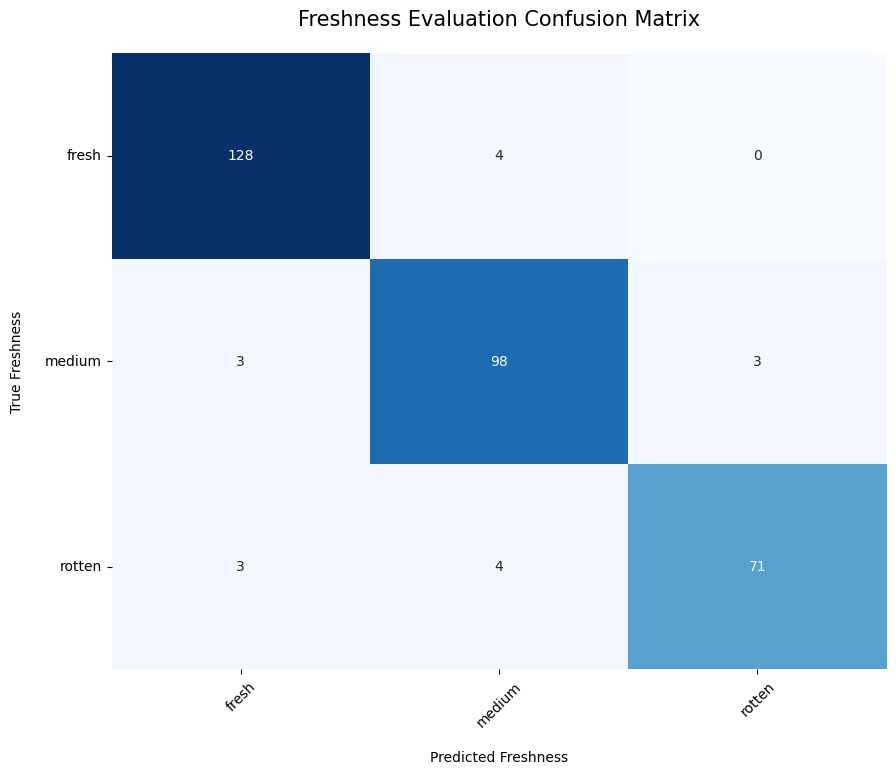

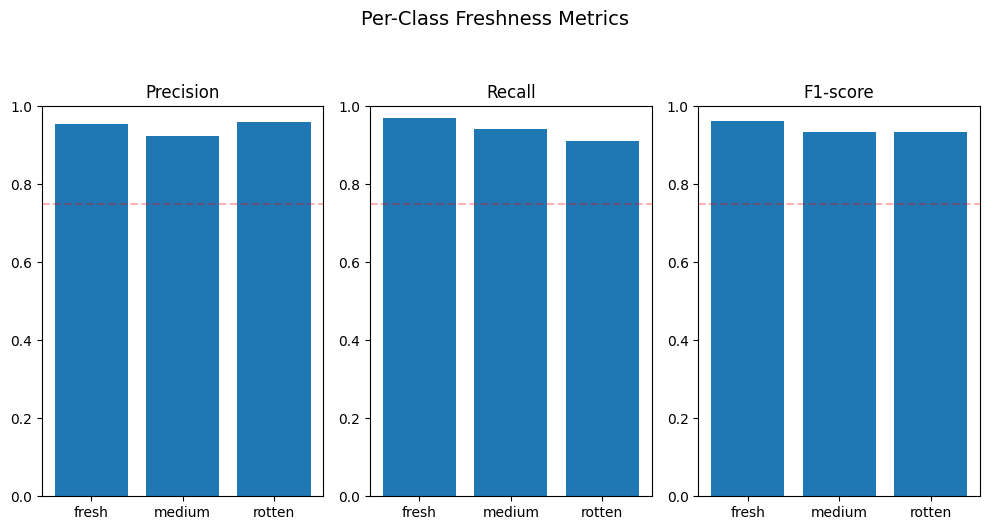

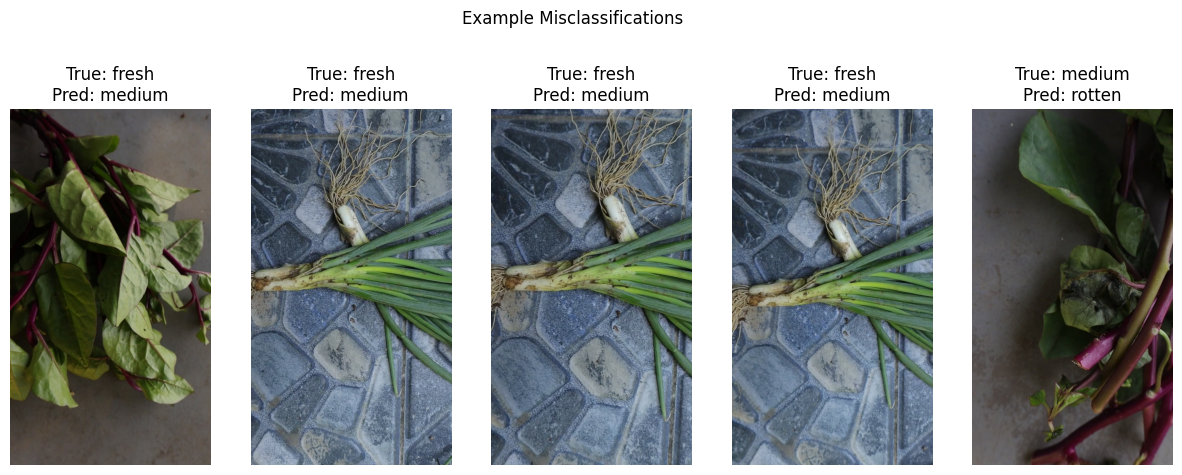

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

# 1. Load your trained model
model = load_model('/content/drive/MyDrive/FINAL_DATASET/models/veg_evaluatorV4.keras')

# 2. Prepare validation generator (ensure shuffle=False)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/FINAL_DATASET_FRESHNESS/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Critical for correct label ordering
)

# 3. Generate predictions
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)
class_names = list(val_generator.class_indices.keys())  # ['fresh', 'medium', 'rotten']

# 4. Classification Report
print("""
╔══════════════════════════════════╗
║      Classification Report       ║
╚══════════════════════════════════╝""")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4
))

# 5. Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar=False)
plt.title('Freshness Evaluation Confusion Matrix', pad=20, fontsize=15)
plt.xlabel('Predicted Freshness', labelpad=15)
plt.ylabel('True Freshness', labelpad=15)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 6. Per-Class Metrics Visualization
metrics = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
del metrics['accuracy'], metrics['macro avg'], metrics['weighted avg']

plt.figure(figsize=(10, 5))
for i, metric in enumerate(['precision', 'recall', 'f1-score']):
    plt.subplot(1, 3, i+1)
    plt.bar(class_names, [metrics[cls][metric] for cls in class_names])
    plt.ylim(0, 1)
    plt.title(metric.capitalize())
    plt.axhline(0.75, color='red', linestyle='--', alpha=0.3)  # Minimum acceptable threshold
plt.suptitle('Per-Class Freshness Metrics', y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

# 7. Error Analysis (Show misclassified examples)
misclassified_idx = np.where(y_pred != y_true)[0]
num_samples = min(5, len(misclassified_idx))  # Show 5 examples

plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified_idx[:num_samples]):
    img_path = val_generator.filepaths[idx]
    img = plt.imread(img_path)

    plt.subplot(1, num_samples, i+1)
    plt.imshow(img)
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.suptitle('Example Misclassifications', y=1.05)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🔍 Prediction Results for /content/drive/MyDrive/ALUGBATI/alugbati_frominternet2.jpg:
- Predicted State: FRESH
- Confidence: 95.9%
- Probability Distribution:
  fresh: 95.9%
  medium: 3.9%
  rotten: 0.2%


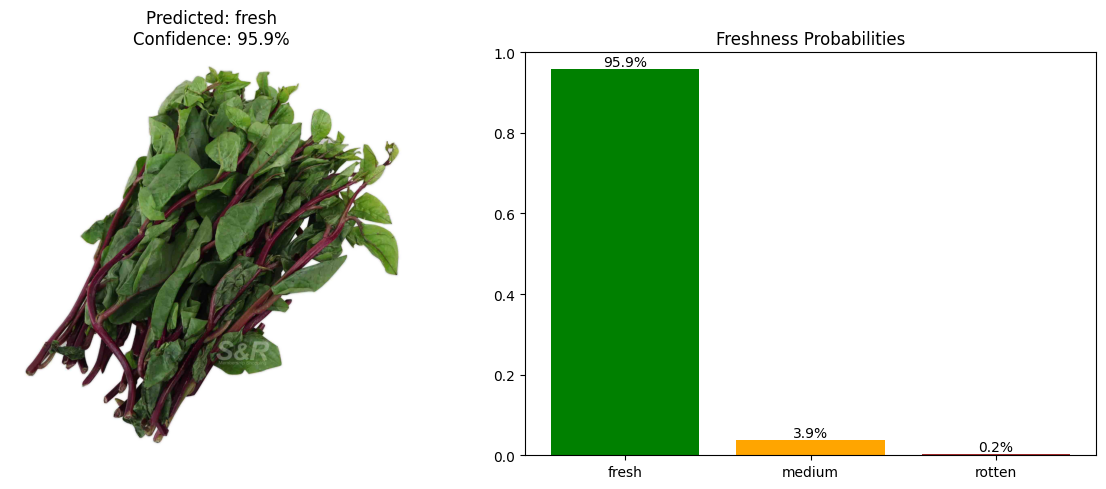

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Constants
MODEL_PATH = '/content/drive/MyDrive/FINAL_DATASET/models/veg_evaluatorV4.keras'
CLASS_NAMES = ['fresh', 'medium', 'rotten']
IMG_SIZE = (224, 224)  # MobileNetV2 input size

def preprocess_image(image_path):
    """Prepares image for model prediction"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")

    img = cv2.resize(img, IMG_SIZE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalize
    return np.expand_dims(img, axis=0)  # Add batch dimension

def predict_freshness(image_path, model):
    """Returns predicted class and confidence"""
    processed_img = preprocess_image(image_path)
    probs = model.predict(processed_img)[0]
    pred_class = CLASS_NAMES[np.argmax(probs)]
    confidence = np.max(probs)
    return pred_class, confidence, probs

def visualize_prediction(image_path, pred_class, confidence, probs):
    """Displays image with prediction results"""
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Predicted: {pred_class}\nConfidence: {confidence:.1%}")
    plt.axis('off')

    # Probabilities
    plt.subplot(1, 2, 2)
    bars = plt.bar(CLASS_NAMES, probs, color=['green', 'orange', 'brown'])
    plt.ylim(0, 1)
    plt.title('Freshness Probabilities')

    # Add probability labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

def evaluate_single_image(image_path):
    """Complete evaluation pipeline for one image"""
    try:
        # Load model (do this once if processing multiple images)
        model = load_model(MODEL_PATH)

        # Make prediction
        pred_class, confidence, probs = predict_freshness(image_path, model)

        # Show results
        print(f"🔍 Prediction Results for {image_path}:")
        print(f"- Predicted State: {pred_class.upper()}")
        print(f"- Confidence: {confidence:.1%}")
        print("- Probability Distribution:")
        for cls, prob in zip(CLASS_NAMES, probs):
            print(f"  {cls}: {prob:.1%}")

        # Visual output
        visualize_prediction(image_path, pred_class, confidence, probs)

        # Special warnings for rotten predictions
        if pred_class == 'rotten' and confidence > 0.7:
            print("\n⚠️ WARNING: High-confidence rotten detection! Discard the item.")
        elif pred_class == 'fresh' and confidence < 0.6:
            print("\n⚠️ CAUTION: Low-confidence fresh prediction. Verify manually.")

    except Exception as e:
        print(f"❌ Error: {str(e)}")

# Example usage
if __name__ == "__main__":
    test_image = '/content/drive/MyDrive/ALUGBATI/alugbati_frominternet2.jpg'
    evaluate_single_image(test_image)